In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
d = pd.read_csv('MTA_DATA_v2.csv')

## Multitouch Attribution and Customer Journey Optimization

### Background

The data represents the web behavior history for all customers who interacted with the website in some way over a given week.  90 days of historical behavior for each customer was added to show the digital marketing channel touch points for the 90 days leading up to a purchase or exit without purchasing.


### Data Definitions

RecordID           = unique record id for entire data set (simliar to index)

Attribution_Date   = Order date or last visit date

90 lookback        = start date of behavior capture

Visitor_key        = database key assigned to unique cookie id from web platform

Hit_date           = the date the visitor first interacted with the listed marketing channel

order_ind          = bolean, did the visitor place and order within the given time window, 1 is an order

container_id       = assigned cart number from the web platform

CID                = marketing campaign_id or friendly URL assignment

Channel            = the marketing channel touch point

Min_Visit Rtrn Cnt = the min visit count number, used for visit sequencing


In [3]:
print(d.shape)
print(d.dtypes)

(4589238, 10)
RecordID                int64
Visitor_key             int64
Attribution_Date       object
90 lookback            object
Order_ind               int64
CONTAINER_ID          float64
Channel                object
CID                    object
Hit_date               object
Min_Visit Rtrn Cnt      int64
dtype: object


In [32]:
# Data type clean up
d['Visitor_key'] = d['Visitor_key'].astype('str')
d['CONTAINER_ID'] = d['CONTAINER_ID'].astype('str')
d['Order_ind'] = d['Order_ind'].astype('int')
d['Hit_date'] = d['Hit_date'].astype('datetime64[ns]')
d['Attribution_Date'] = d['Attribution_Date'].astype('datetime64[ns]')
print(d.dtypes)

RecordID                       int64
Visitor_key                   object
Attribution_Date      datetime64[ns]
90 lookback                   object
Order_ind                      int32
CONTAINER_ID                  object
Channel                       object
CID                           object
Hit_date              datetime64[ns]
Min_Visit Rtrn Cnt             int64
dtype: object


In [5]:
print(d.describe())
d.head(10)

           RecordID     Order_ind  Min_Visit Rtrn Cnt
count  4.589238e+06  4.589238e+06        4.589238e+06
mean   2.294620e+06  1.119569e-01        6.367972e+01
std    1.324799e+06  3.153135e-01        1.236906e+02
min    1.000000e+00  0.000000e+00        1.000000e+00
25%    1.147310e+06  0.000000e+00        3.000000e+00
50%    2.294620e+06  0.000000e+00        1.600000e+01
75%    3.441929e+06  0.000000e+00        6.300000e+01
max    4.589238e+06  1.000000e+00        9.990000e+02


,RecordID,Visitor_key,Attribution_Date,90 lookback,Order_ind,CONTAINER_ID,Channel,CID,Hit_date,Min_Visit Rtrn Cnt
0,1,100004047,2018-11-07,2018-08-09,0,nan,Paid Search,NaN,2018-10-24,39
1,2,100004047,2018-11-07,2018-08-09,0,nan,Paid Search,NaN,2018-11-06,40
2,3,100004047,2018-11-07,2018-08-09,0,nan,Paid Search,SEO,2018-11-07,41
3,4,100004089,2018-11-09,2018-08-11,0,nan,Paid Search,NaN,2018-08-13,66
4,5,100004089,2018-11-09,2018-08-11,0,nan,SEO,SEO,2018-09-19,67
5,6,100004089,2018-11-09,2018-08-11,0,nan,SEO,NaN,2018-10-23,68
6,7,100004089,2018-11-09,2018-08-11,0,nan,SEO,SEO,2018-10-23,69
7,8,100004089,2018-11-09,2018-08-11,0,nan,Paid Search,SEO,2018-10-26,71
8,9,100004089,2018-11-09,2018-08-11,0,nan,Paid Search,SEO,2018-10-30,72
9,10,100004089,2018-11-09,2018-08-11,0,nan,Paid Search,SEO,2018-11-07,73


In [33]:
# Check for nulls
d.isna().sum()

RecordID                    0
Visitor_key                 0
Attribution_Date            0
90 lookback                 0
Order_ind                   0
CONTAINER_ID                0
Channel                     0
CID                   1700684
Hit_date                    0
Min_Visit Rtrn Cnt          0
dtype: int64

In [34]:
d.CID = d.CID.fillna('noCID')
d.isna().sum()

RecordID              0
Visitor_key           0
Attribution_Date      0
90 lookback           0
Order_ind             0
CONTAINER_ID          0
Channel               0
CID                   0
Hit_date              0
Min_Visit Rtrn Cnt    0
dtype: int64

In [35]:
d.describe()

,RecordID,Order_ind,Min_Visit Rtrn Cnt
count,4.589238e+06,4.589238e+06,4.589238e+06
mean,2.294620e+06,1.119569e-01,6.367972e+01
std,1.324799e+06,3.153135e-01,1.236906e+02
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.147310e+06,0.000000e+00,3.000000e+00
50%,2.294620e+06,0.000000e+00,1.600000e+01
75%,3.441929e+06,0.000000e+00,6.300000e+01
max,4.589238e+06,1.000000e+00,9.990000e+02


In [36]:
# Number of unique customers interacting with a particular channel
d.groupby('Channel')['Visitor_key'].nunique()

Channel
Digital Event        15
Direct+Other      31599
Display          106762
Email             22104
Friendly URL      29895
Paid Search      286905
SEO              599576
Social            36232
Social-Paid        5005
Unknown          345293
Name: Visitor_key, dtype: int64

In [37]:
# Clean up the channel "Unknown" it is mislabeled.  It sould be "Direct+Other".
d['Channel'] = d['Channel'].str.replace('Unknown','Direct+Other')
d.groupby('Channel')['Visitor_key'].nunique()

Channel
Digital Event        15
Direct+Other     371696
Display          106762
Email             22104
Friendly URL      29895
Paid Search      286905
SEO              599576
Social            36232
Social-Paid        5005
Name: Visitor_key, dtype: int64

In [38]:
# Number of customer placing orders vs not placing orders
# Also calculate the total number of orders
avgs = d.groupby('Order_ind').agg({'Visitor_key': 'nunique', 'CONTAINER_ID' : 'nunique'})

# calculate avg orders per customer 
avgs['avg_orders_customer'] = avgs['CONTAINER_ID']/avgs['Visitor_key']
avgs


,Visitor_key,CONTAINER_ID,avg_orders_customer
Order_ind,,,
0,1096290,9774,0.008916
1,16200,26829,1.656111


In [39]:
#Visualize the distribution of customer making orders
cust_ords = d.loc[d.Order_ind == 1]
cust_ords = cust_ords.groupby('Visitor_key').agg({'CONTAINER_ID': 'nunique'})
cust_ords.CONTAINER_ID.sort_values(ascending=False)

Visitor_key
185642736    93
202150115    76
207870319    58
209355556    57
194777792    49
204791313    46
154503057    44
208295600    43
151266701    41
91462241     38
209759075    38
143750693    37
190887096    36
32465714     33
90198681     31
181415909    31
200542358    30
141412049    30
181257378    29
209779226    29
167195483    27
204777808    27
169551350    26
98596478     26
200585186    26
201226712    25
209013556    25
137821135    24
120392986    24
209257643    24
             ..
207877425     1
207876458     1
207951534     1
207953213     1
207991055     1
207953218     1
207986604     1
207986429     1
207984845     1
207983745     1
207983021     1
207982340     1
207982065     1
207981300     1
207980647     1
207979515     1
207979358     1
207978705     1
207975587     1
207970964     1
207968659     1
207964202     1
207963097     1
207961811     1
207959280     1
207958979     1
207957803     1
207954210     1
207953269     1
100049407     1
Name: CONTAI

(array([1.5235e+04, 6.2800e+02, 1.5300e+02, 6.6000e+01, 2.3000e+01,
        2.5000e+01, 2.5000e+01, 1.4000e+01, 9.0000e+00, 2.0000e+00,
        6.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.        ,  3.78787879,  6.57575758,  9.36363636, 12.15151515,
        14.93939394, 17.72727273, 20.51515152, 23.3030303 , 26.09090909,
        28.87878788, 31.66666667, 34.45454545, 37.24242424, 40.03030303,
        42.81818182, 45.60606061, 48.39393939, 51.18181818, 53.96969697,
        56.75757576, 59.54545455, 62.33333333, 65.12121212, 67.90909091,
        70.6969697 , 73.48484848, 76.27272727, 79.06060606, 81.84848485,
        84.63636364, 87.42424242, 90.21212121, 93.        ]),
 <a list of 33 Patch objects>)

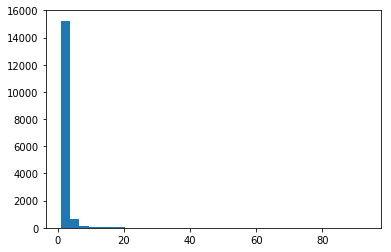

In [40]:
bins = int(1+3.322*(np.log(len (cust_ords.CONTAINER_ID)))) #use Sturge's rule to define appropriate number of bins
plt.hist(cust_ords.CONTAINER_ID, bins) #plot historgram

(array([77., 37., 20.,  9.,  3.,  4.,  3.,  2.,  0.,  2.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.]),
 array([11.        , 15.82352941, 20.64705882, 25.47058824, 30.29411765,
        35.11764706, 39.94117647, 44.76470588, 49.58823529, 54.41176471,
        59.23529412, 64.05882353, 68.88235294, 73.70588235, 78.52941176,
        83.35294118, 88.17647059, 93.        ]),
 <a list of 17 Patch objects>)

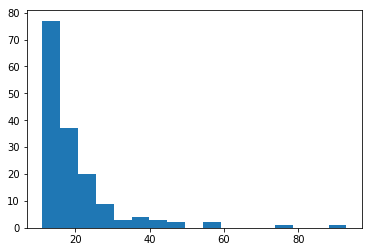

In [44]:
cust_ords_ten = cust_ords.loc[cust_ords.CONTAINER_ID > 10]
bins = int(1+3.322*(np.log(len (cust_ords_ten.CONTAINER_ID)))) #use Sturge's rule to define appropriate number of bins
plt.hist(cust_ords_five.CONTAINER_ID, bins) #plot historgram

We see a small number of customers placing a large number of orders (expected in a B2B environment )

### Problem Statement: 
    How did customers journey's influence their buying process?

In [14]:
# grp_fld =  Create consistent level of detail within the data representing an individual customer journey
d['grp_fld'] = d.Visitor_key + d.CONTAINER_ID

#How many customer journey's are we evaluating here? (about 1.1 Million)
d['grp_fld'].nunique()

1133186

Create field that shows the customer journey 90 days before the period being evaluated.

If a customer had multiple orders, each order will have a 90 window preceeding that "journey" with overlap

In [15]:
dfa = d.groupby(['grp_fld','Channel','Visitor_key','CONTAINER_ID','Order_ind']).agg({'Min_Visit Rtrn Cnt': 'min'})

dfa["TouchSeq"] = dfa.groupby('grp_fld')['Min_Visit Rtrn Cnt'].rank(method='dense', ascending=True).astype(int)
dfa.head(10)

,grp_fld,Channel,Visitor_key,CONTAINER_ID,Order_ind,Min_Visit Rtrn Cnt,TouchSeq
0,100004047nan,Paid Search,100004047,nan,0,39,1
1,100004089nan,Paid Search,100004089,nan,0,66,1
2,100004089nan,SEO,100004089,nan,0,67,2
3,100004330nan,SEO,100004330,nan,0,1,1
4,100005707nan,Direct+Other,100005707,nan,0,206,1
5,100005707nan,SEO,100005707,nan,0,207,2
6,100005707nan,Paid Search,100005707,nan,0,214,3
7,100014699nan,Paid Search,100014699,nan,0,9,1
8,100014699nan,Direct+Other,100014699,nan,0,10,2
9,100015582nan,SEO,100015582,nan,0,100,1


In [17]:
#workbook tends to crash at next step, writing CSV as break point in flow and to potentially purge memory
dfa.to_csv('Agg_Clean_MTA_DATA.csv', index=True)
print('DONE WRITING CSV ---  Agg_Clean_MTA_DATA.csv')

DONE WRITING CSV ---  Agg_Clean_MTA_DATA.csv


##### Restart kernel 

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfa = pd.read_csv('Agg_Clean_MTA_DATA.csv', index_col=[0])
dfa.dtypes
dfa.shape

(1500553, 7)

In [46]:
dfa.head()

,grp_fld,Channel,Visitor_key,CONTAINER_ID,Order_ind,Min_Visit Rtrn Cnt,TouchSeq
0,100004047nan,Paid Search,100004047,NaN,0,39,1
1,100004089nan,Paid Search,100004089,NaN,0,66,1
2,100004089nan,SEO,100004089,NaN,0,67,2
3,100004330nan,SEO,100004330,NaN,0,1,1
4,100005707nan,Direct+Other,100005707,NaN,0,206,1


In [47]:
dfa['jrnys'] = dfa.groupby(['grp_fld'])['Channel'].transform(lambda x: '>'.join(x))
dfa.head()

,grp_fld,Channel,Visitor_key,CONTAINER_ID,Order_ind,Min_Visit Rtrn Cnt,TouchSeq,jrnys
0,100004047nan,Paid Search,100004047,NaN,0,39,1,Paid Search
1,100004089nan,Paid Search,100004089,NaN,0,66,1,Paid Search>SEO
2,100004089nan,SEO,100004089,NaN,0,67,2,Paid Search>SEO
3,100004330nan,SEO,100004330,NaN,0,1,1,SEO
4,100005707nan,Direct+Other,100005707,NaN,0,206,1,Direct+Other>SEO>Paid Search


In [48]:
print(dfa.shape)
print(dfa.columns)
dfa.to_csv('Agg_Clean_MTA_DATA_wJourneys.csv', index=True)

(1500553, 8)
Index([u'grp_fld', u'Channel', u'Visitor_key', u'CONTAINER_ID', u'Order_ind',
       u'Min_Visit Rtrn Cnt', u'TouchSeq', u'jrnys'],
      dtype='object')


In [49]:
# Create lookup table listing the unique journeys and the number of customers taking it
list_o_journeys = dfa.groupby('jrnys').agg({'grp_fld': 'nunique'})
list_o_journeys.rename(columns={'grp_fld':'Total_Jrny_Cnt'}, inplace=True)
list_o_journeys.Total_Jrny_Cnt.sort_values(ascending=False)
len(list_o_journeys)

# 1,440 distinct journeys

1440

In [50]:
# Group to all customer journeys, removes Channel and touch_seq level of deatil from dataset
all_cust_j = pd.DataFrame(dfa[['grp_fld','jrnys','Order_ind']].drop_duplicates())
all_cust_j.head()


,grp_fld,jrnys,Order_ind
0,100004047nan,Paid Search,0
1,100004089nan,Paid Search>SEO,0
3,100004330nan,SEO,0
4,100005707nan,Direct+Other>SEO>Paid Search,0
7,100014699nan,Paid Search>Direct+Other,0


In [57]:
# Calculate probability
# Join total number of customer taking a journey to the individual journeys

transitions = pd.merge(all_cust_j, list_o_journeys, on='jrnys', how='left')
transitions['prob'] = 1/transitions['Total_Jrny_Cnt']
transitions.head(25)

,grp_fld,jrnys,Order_ind,Total_Jrny_Cnt,prob
0,100004047nan,Paid Search,0,145280,0.000007
1,100004089nan,Paid Search>SEO,0,20956,0.000048
2,100004330nan,SEO,0,373583,0.000003
3,100005707nan,Direct+Other>SEO>Paid Search,0,8896,0.000112
4,100014699nan,Paid Search>Direct+Other,0,5992,0.000167
5,100015582nan,SEO>Direct+Other,0,47814,0.000021
6,100015656nan,Direct+Other,0,205131,0.000005
7,100016384nan,SEO>Direct+Other,0,47814,0.000021
8,100016408nan,SEO>Direct+Other,0,47814,0.000021
9,100025870nan,SEO,0,373583,0.000003


In [52]:
# Check aggregate, should sum to 1

test = transitions.groupby('jrnys')['prob'].sum()
test.describe()

count    1.440000e+03
mean     1.000000e+00
std      1.717892e-13
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: prob, dtype: float64

In [53]:
# Calculate the total orders per journey

ords  = transitions.groupby(['jrnys']).agg({'Order_ind': 'sum'})
ords.rename(columns={'Order_ind':'Total_ords'}, inplace=True)
ords.head()

,Total_ords
jrnys,
Digital Event,0
Digital Event>Paid Search>Display>Email,0
Digital Event>Paid Search>Friendly URL>SEO>Direct+Other>Email,0
Direct+Other,6468
Direct+Other>Display,18


In [54]:
# Aggregate probabilities to if the customer converted at the end of the journey or not
prob_pvt = pd.pivot_table(transitions, values='prob',index=['jrnys'], columns=['Order_ind'], aggfunc=np.sum, fill_value=0)
prob_pvt.reset_index(inplace=True)
prob_pvt.head()

Order_ind,jrnys,0,1
0,Digital Event,1.000000,0.000000
1,Digital Event>Paid Search>Display>Email,1.000000,0.000000
2,Digital Event>Paid Search>Friendly URL>SEO>Dir...,1.000000,0.000000
3,Direct+Other,0.968469,0.031531
4,Direct+Other>Display,0.993808,0.006192


In [55]:
# show the number of journeys being evaluated in each set
final = pd.merge(prob_pvt, list_o_journeys, on='jrnys', how='left')
final = pd.merge(final, ords, on='jrnys', how='left')
final.sort_values('Total_Jrny_Cnt', ascending=False)
final


,jrnys,0,1,Total_Jrny_Cnt,Total_ords
0,Digital Event,1.000000,0.000000,2,0
1,Digital Event>Paid Search>Display>Email,1.000000,0.000000,1,0
2,Digital Event>Paid Search>Friendly URL>SEO>Dir...,1.000000,0.000000,1,0
3,Direct+Other,0.968469,0.031531,205131,6468
4,Direct+Other>Display,0.993808,0.006192,2907,18
5,Direct+Other>Display>Email,0.968750,0.031250,32,1
6,Direct+Other>Display>Email>Friendly URL,1.000000,0.000000,2,0
7,Direct+Other>Display>Email>Friendly URL>SEO,1.000000,0.000000,1,0
8,Direct+Other>Display>Email>Paid Search,1.000000,0.000000,3,0
9,Direct+Other>Display>Email>SEO,1.000000,0.000000,3,0


In [29]:
# Score journeys to find the most effective
final['jrny_score'] = final.Total_ords*final[1]
final.sort_values(by='jrny_score', ascending=False)

,jrnys,0,1,Total_Jrny_Cnt,Total_ords,score,jrny_score
68,Direct+Other>Friendly URL,0.599553,0.400447,4023,1611,645.120805,645.120805
548,Friendly URL>Direct+Other,0.459196,0.540804,821,444,240.116931,240.116931
3,Direct+Other,0.968469,0.031531,205131,6468,203.942963,203.942963
150,Direct+Other>SEO,0.941642,0.058358,40954,2390,139.475997,139.475997
176,Direct+Other>SEO>Friendly URL,0.714018,0.285982,1598,457,130.693992,130.693992
998,SEO>Direct+Other>Friendly URL,0.771201,0.228799,2264,518,118.517668,118.517668
566,Friendly URL>Direct+Other>SEO,0.515294,0.484706,425,206,99.849412,99.849412
646,Friendly URL>Paid Search>SEO>Email,0.088235,0.911765,102,93,84.794118,84.794118
95,Direct+Other>Friendly URL>SEO,0.743632,0.256368,1217,312,79.986853,79.986853
1131,SEO>Friendly URL,0.840339,0.159661,2950,471,75.200339,75.200339


# Next Steps

The current model looks at the customer's journey in total. Leveraging the large dataset we are assuming normalization.

Additional analysis could be done with a more indepth approach to the Markov Chain.

These customer journey's are considered a graph.
Each graph is made up of vertexes (channel touch points) and edges(distance between touch points).
I intend to use the time it takes for a user to transition(the length/weight of an edge) weight can be applied to to the transition.
At this point the sequence of transitions are relevant as well the weighting as this process likely requires "memory".  Memory in the sense that the prior behavior is important as it determines the next possible transition.  This is where the model I suspect is needed in this case, deveates from the classic markov model.  In a classic markov process, the system has no memory.
In this data we see a undirected cyclic graph.  This means visitors are visiting a channel more than once within the same journey.
As a result, many nodes need to be created to create a process to evaluate each customer journey and against all customer journeys.  The laptop development environment may need to be scaled to an enterprise level solution with the necessary memory and compute power to process the data volume.

In [ ]:
# some thoughts on the code I have...

In [24]:
dfb = d[['grp_fld','Visitor_key','CONTAINER_ID','Order_ind']]
dfb = dfb.drop_duplicates()
dfb['Min_Visit Rtrn Cnt'] = -1 #set to the beginning of the sort order
dfb['TouchSeq'] = 0
dfb['Channel'] = 'Start'


print(dfb.shape)
print(dfb.dtypes)
print(dfb.describe())
dfb.head()

(1694, 7)
grp_fld               object
Visitor_key           object
CONTAINER_ID          object
Order_ind             object
Min_Visit Rtrn Cnt     int64
TouchSeq               int64
Channel               object
dtype: object
       Min_Visit Rtrn Cnt  TouchSeq
count              1694.0    1694.0
mean                 -1.0       0.0
std                   0.0       0.0
min                  -1.0       0.0
25%                  -1.0       0.0
50%                  -1.0       0.0
75%                  -1.0       0.0
max                  -1.0       0.0


,grp_fld,Visitor_key,CONTAINER_ID,Order_ind,Min_Visit Rtrn Cnt,TouchSeq,Channel
0,100004047nan0,100004047,nan,0,-1,0,Start
7,100004089nan0,100004089,nan,0,-1,0,Start
26,100004330nan0,100004330,nan,0,-1,0,Start
27,100004713nan0,100004713,nan,0,-1,0,Start
36,100005387nan0,100005387,nan,0,-1,0,Start


In [14]:
dfc = dfa.groupby(['grp_fld','Visitor_key','CONTAINER_ID','Order_ind']).agg({'TouchSeq': 'max','Hit_date': 'max'})
dfc = dfc.reset_index()

# use function to determine if order was created
def chan(row):
    if row['Order_ind'] == "1":
        return 'Conv'
    else:
        return 'End'
dfc['Channel'] = dfc.apply(chan, axis=1)

#set final touch sequence number
dfc['TouchSeq'] = dfc['TouchSeq'] + 1

dfc.head()

,grp_fld,Visitor_key,CONTAINER_ID,Order_ind,TouchSeq,Hit_date,Channel
0,100004047nan0,100004047,nan,0,3,2018-11-07,End
1,100004089nan0,100004089,nan,0,3,2018-11-07,End
2,100004330nan0,100004330,nan,0,2,2018-11-06,End
3,100004713nan0,100004713,nan,0,4,2018-11-13,End
4,100005387nan0,100005387,nan,0,2,2018-11-19,End


##### Establish ending point for each journey

In [27]:
frames = [dfa, dfb, dfc]

dff = pd.concat(frames, axis=0, join='outer', join_axes=None, ignore_index=True,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True, sort=True)

dff.shape
dff.sort_values(by=['grp_fld','TouchSeq'] ,inplace=True)
dff.head(100)

,CONTAINER_ID,Channel,Hit_date,Min_Visit Rtrn Cnt,Order_ind,TouchSeq,Visitor_key,grp_fld
2759,nan,Start,NaT,-1.0,0,0,100004047,100004047nan0
0,nan,Paid Search,2018-11-06,39.0,0,1,100004047,100004047nan0
1,nan,SEO,2018-11-07,41.0,0,2,100004047,100004047nan0
4453,nan,End,2018-11-07,NaN,0,3,100004047,100004047nan0
2760,nan,Start,NaT,-1.0,0,0,100004089,100004089nan0
2,nan,Paid Search,2018-11-07,65.0,0,1,100004089,100004089nan0
3,nan,SEO,2018-11-07,67.0,0,2,100004089,100004089nan0
4454,nan,End,2018-11-07,NaN,0,3,100004089,100004089nan0
2761,nan,Start,NaT,-1.0,0,0,100004330,100004330nan0
4,nan,SEO,2018-11-06,1.0,0,1,100004330,100004330nan0


In [28]:
dff.shape

(6147, 8)

In [29]:
# Select relevant columns for Markov Chain Analysis
journeys = dff[['grp_fld','Visitor_key','Order_ind','CONTAINER_ID','TouchSeq','Hit_date','Channel']]
journeys.reset_index(drop=True, inplace=True)

# not used, just a thought..
#journeys['FullPath'] = journeys.groupby(['grp_fld','Visitor_key','Order_ind','CONTAINER_ID'])['Channel'].transform(lambda x: '>'.join(x))


In [33]:
conditions_a = ['End','Conv']
journeys['Transition'] = np.where(journeys['Channel'].isin(conditions_a),np.nan ,journeys['Channel'].shift(-1))
conditions_b = ['Start']
journeys['LastTouchDate'] = np.where(journeys['Channel'].isin(conditions_b),np.datetime64('nat'),journeys['Hit_date'].shift(-1))
#journeys['Channel'] = journeys['Channel'].shift(-1)
journeys.head(10)

,grp_fld,Visitor_key,Order_ind,CONTAINER_ID,TouchSeq,Hit_date,Channel,Transition,LastTouchDate
0,100004047nan0,100004047,0,nan,0,NaT,Start,Paid Search,NaT
1,100004047nan0,100004047,0,nan,1,2018-11-06,Paid Search,SEO,2018-11-07
2,100004047nan0,100004047,0,nan,2,2018-11-07,SEO,End,2018-11-07
3,100004047nan0,100004047,0,nan,3,2018-11-07,End,NaN,NaT
4,100004089nan0,100004089,0,nan,0,NaT,Start,Paid Search,NaT
5,100004089nan0,100004089,0,nan,1,2018-11-07,Paid Search,SEO,2018-11-07
6,100004089nan0,100004089,0,nan,2,2018-11-07,SEO,End,2018-11-07
7,100004089nan0,100004089,0,nan,3,2018-11-07,End,NaN,NaT
8,100004330nan0,100004330,0,nan,0,NaT,Start,SEO,NaT
9,100004330nan0,100004330,0,nan,1,2018-11-06,SEO,End,2018-11-06


In [23]:
# Filter the End and Conv from channel
# this represents the starting point from which a customer transtions to another channel
# these two conditions have no transition

journeys = journeys.loc[(journeys.Channel != 'End') & (journeys.Channel != 'Conv')]
journeys.head()

,grp_fld,Visitor_key,Order_ind,CONTAINER_ID,TouchSeq,Hit_date,Channel,Transition
0,100004047nan0,100004047,0,nan,0,NaT,Start,Paid Search
1,100004047nan0,100004047,0,nan,1,2018-11-06,Paid Search,SEO
2,100004047nan0,100004047,0,nan,2,2018-11-07,SEO,End
4,100004089nan0,100004089,0,nan,0,NaT,Start,Paid Search
5,100004089nan0,100004089,0,nan,1,2018-11-07,Paid Search,SEO


In [18]:
# Create lookup table with total number of transitions per Channel
initial_channel_counts = journeys.groupby('Channel').agg ({'Transition': 'count'}).reset_index()
initial_channel_counts.rename(columns={'Transition':'Total_transitions'}, inplace=True)
initial_channel_counts.columns

Index([u'Channel', u'Total_transitions'], dtype='object')

In [19]:
# Join the lookup table to the transitions table, to pull in the counts for each starting state, t.
Transitions = pd.merge(journeys, initial_channel_counts, on='Channel', how='left')
Transitions.head(100)

,grp_fld,Visitor_key,Order_ind,CONTAINER_ID,TouchSeq,Channel,Transition,Total_transitions
0,100004047nan0,100004047,0,nan,0,Start,Paid Search,3972992
1,100004047nan0,100004047,0,nan,1,Paid Search,SEO,894252
2,100004047nan0,100004047,0,nan,2,SEO,End,1976015
3,100004089nan0,100004089,0,nan,0,Start,Paid Search,3972992
4,100004089nan0,100004089,0,nan,1,Paid Search,SEO,894252
5,100004089nan0,100004089,0,nan,2,SEO,End,1976015
6,100004330nan0,100004330,0,nan,0,Start,SEO,3972992
7,100004330nan0,100004330,0,nan,1,SEO,End,1976015
8,100004606114473205.01,100004606,1,114473205.0,0,Start,Direct+Other,3972992
9,100004606114473205.01,100004606,1,114473205.0,1,Direct+Other,SEO,1281018


In [20]:
Transitions['probability'] = 1/Transitions['Total_transitions']
Transitions.head(100)

,grp_fld,Visitor_key,Order_ind,CONTAINER_ID,TouchSeq,Channel,Transition,Total_transitions,probability
0,100004047nan0,100004047,0,nan,0,Start,Paid Search,3972992,2.516995e-07
1,100004047nan0,100004047,0,nan,1,Paid Search,SEO,894252,1.118253e-06
2,100004047nan0,100004047,0,nan,2,SEO,End,1976015,5.060690e-07
3,100004089nan0,100004089,0,nan,0,Start,Paid Search,3972992,2.516995e-07
4,100004089nan0,100004089,0,nan,1,Paid Search,SEO,894252,1.118253e-06
5,100004089nan0,100004089,0,nan,2,SEO,End,1976015,5.060690e-07
6,100004330nan0,100004330,0,nan,0,Start,SEO,3972992,2.516995e-07
7,100004330nan0,100004330,0,nan,1,SEO,End,1976015,5.060690e-07
8,100004606114473205.01,100004606,1,114473205.0,0,Start,Direct+Other,3972992,2.516995e-07
9,100004606114473205.01,100004606,1,114473205.0,1,Direct+Other,SEO,1281018,7.806292e-07


In [21]:
# Check totals, that porbability is 1
df_test = Transitions.groupby('Channel').agg({'probability': 'sum'})
df_test

,probability
Channel,
Digital Event,1.0
Direct+Other,1.0
Display,1.0
Email,1.0
Friendly URL,1.0
Paid Search,1.0
SEO,1.0
Social,1.0
Social-Paid,1.0


In [22]:
df_transition_prob = Transitions.groupby(['Channel','Transition']).agg({'probability':'sum'}).reset_index()
df_transition_prob

,Channel,Transition,probability
0,Digital Event,Conv,0.133333
1,Digital Event,Direct+Other,0.177778
2,Digital Event,Email,0.044444
3,Digital Event,End,0.288889
4,Digital Event,Friendly URL,0.088889
5,Digital Event,Paid Search,0.200000
6,Digital Event,SEO,0.044444
7,Digital Event,Social,0.022222
8,Direct+Other,Conv,0.034686
9,Direct+Other,Digital Event,0.000009


In [27]:
#Fit DataFrame to code
df_transition_prob.rename(columns={'Channel':'t','Transition':'t_plus_1'}, inplace=True)

df_transition_prob

,t,t_plus_1,probability
0,Digital Event,Conv,0.133333
1,Digital Event,Direct+Other,0.177778
2,Digital Event,Email,0.044444
3,Digital Event,End,0.288889
4,Digital Event,Friendly URL,0.088889
5,Digital Event,Paid Search,0.200000
6,Digital Event,SEO,0.044444
7,Digital Event,Social,0.022222
8,Direct+Other,Conv,0.034686
9,Direct+Other,Digital Event,0.000009


### Calculate Total Conversion Probability

In [24]:
def print_node(node, debug=False):
    # Print each node as it's processed. For debugging purposes.
    
    if not debug:
        return
    
    if node['t_plus_1'] in ['End', 'Conv']:
        node_type = 'Leaf'
    else:
        node_type = 'Parent'
    
    print('%s > %s' % (node['t'], node['t_plus_1']))
    print('Type: %s' % node_type)
    print('Prob: %0.2f' % node['probability'])
    print('----------------------------')

### ASSUMES THE TRANSITION DATAFRAME REPRESENTS A "DAG"
###### https://www.python-course.eu/graphs_python.php  for solution ideas...

In [25]:
calculated_node_probabilities = dict()

def calc_conversion_probability(starting_state, df_transitions, cum_probability, calculated_nodes, debug=True):
    # Calculates the cumulative probability of reaching a conversion, given a starting state.
    # Assumes the transition dataframe represents a Directed Acyclic Graph (DAG)
        
    # Get the transition probabilities for the starting state we're evaluating
    df_nodes = df_transitions[df_transitions['t'] == starting_state]

    
    # Loop through the starting states and either return the probability for 
    # a leaf node, or recurse to keep following the tree.
    
    node_conversion_probability = 0
    
    child_node_proabilities = []
    
    for index, row in df_nodes.iterrows():
        
        # These are leaf nodes: either an exit or conversion
        if row['t_plus_1'] == 'End':
            print_node(row, debug)
            child_node_proabilities.append(0)
        
        elif row['t_plus_1'] == 'Conv':
            print_node(row, debug)
            child_node_proabilities.append(row['probability'])
        
        # This is a parent node: Keep following the rabbit hole
        else:
            
            # Have we cached the total probability for this node???
            if row['t_plus_1'] in calculated_nodes:
                if debug:
                    print('Cache Hit for %s! Cum probability from child: %0.2f' % (row['t_plus_1'], calculated_nodes[row['t_plus_1']]))
                child_probability = calculated_nodes[row['t_plus_1']]
            
            # No cached value found. We'll walk through the tree to calculated the value.
            else:
                # Recursive call
                child_probability = calc_conversion_probability(row['t_plus_1'], 
                                                                df_transitions, 
                                                                cum_probability + row['probability'],
                                                                calculated_nodes, 
                                                                debug)
                node_conversion_prob = child_probability * row['probability']
                
            print_node(row, debug)
            child_node_proabilities.append(node_conversion_prob)
                    
            if debug:
                print('%s > %s' % (row['t'], row['t_plus_1']))
                print('Cum Prob from Child : %0.2f' % child_probability)
                print('Prob to Child Node  : %0.2f' % row['probability'])
                print('Node Conv Proability: %0.2f' % node_conversion_prob)
                print('----------------------------')
    
    total_node_probability = sum(child_node_proabilities)
    if debug:
        print('Node Conversion Probability for %s: %0.2f' % (starting_state, total_node_probability))
        print('----------------------------')
    
    # We'll cache the calculated total probability for the node, so we don't have to calculate it again.
    calculated_node_probabilities[starting_state] = total_node_probability
        
    return total_node_probability

In [28]:
starting_node = 'SEO'
print('====== START DEBUG PRINT ======')
total_probability = calc_conversion_probability(starting_node, df_transition_prob, 0, calculated_node_probabilities)
print('====== END DEBUG PRINT ======')
print(' ')
print('Total Conversion Probability from %s: %0.2f' % (starting_node, total_probability))

====== START DEBUG PRINT ======
SEO > Conv
Type: Leaf
Prob: 0.01
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
-----

Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------

Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------

Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------

Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------

Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------
Direct+Other > Conv
Type: Leaf
Prob: 0.03
----------------------------
Digital Event > Conv
Type: Leaf
Prob: 0.13
----------------------------

RuntimeError: maximum recursion depth exceeded while calling a Python object

##### No Final output, error received is "RuntimeError: maximum recursion depth exceeded while calling a Python object"